In [6]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

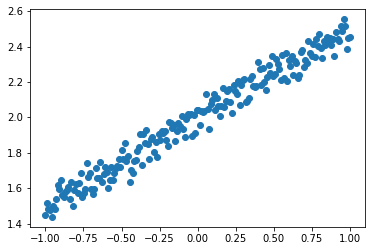

In [7]:
# create some data

X = np.linspace(-1, 1, 200)


np.random.shuffle(X)    # randomize the data

Y = 0.5 * X + 2 + np.random.normal(0, 0.05, (200, ))
# plot data
plt.scatter(X, Y)
plt.show()

In [8]:
X_train, Y_train = X[:160], Y[:160]     # first 160 data points
X_test, Y_test = X[160:], Y[160:]       # last 40 data points


In [9]:
# build a neural network from the 1st layer to the last layer
model = Sequential()

model.add(Dense(units=1, input_dim=1)) 

# choose loss function and optimizing method
model.compile(loss='mse', optimizer='sgd')

In [10]:
# training
print('Training -----------')
for step in range(301):
    cost = model.train_on_batch(X_train, Y_train)
    if step % 100 == 0:
        print('train cost: ', cost)

Training -----------
train cost:  4.452797889709473
train cost:  0.1293020099401474
train cost:  0.018677741289138794
train cost:  0.006959336809813976


In [11]:
# test
print('Testing ------------')
cost = model.evaluate(X_test, Y_test, batch_size=40)
print('test cost:', cost)
W, b = model.layers[0].get_weights()
print('Weights=', W, '\nbiases=', b)


Testing ------------
1/1 [==============================] - 0s 1ms/step - loss: 0.0087
test cost: 0.008732345886528492
Weights= [[0.6166482]] 
biases= [2.0059092]


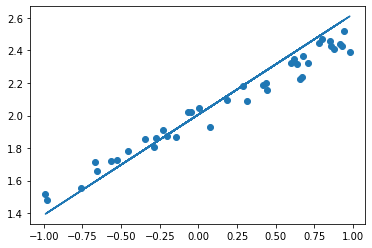

In [14]:
# plotting the prediction
Y_pred = model.predict(X_test)
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred)
plt.show()